In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ds_salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Scikit,Tensor,Hadoop,Tableau,BI,Flink,Mongo,Google_an,Degree,Job Title Category
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,0,1,1,0,0,0,Bachelor,Data Scientist
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,1,0,0,0,Master,Data Scientist
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,1,0,0,0,Master,Data Scientist
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,1,0,0,0,NaN,Data Scientist
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,1,0,0,0,NaN,Data Scientist


In [3]:
# Reveal all columns
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'company_txt', 'Job Location', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'Python', 'R', 'Spark', 'AWS', 'Excel', 'SQL',
       'SAS', 'Keras', 'Pytorch', 'Scikit', 'Tensor', 'Hadoop', 'Tableau',
       'BI', 'Flink', 'Mongo', 'Google_an', 'Degree', 'Job Title Category'],
      dtype='object')

In [4]:
# Define functions to simplify job descriptions and level seniority

def title_simplifier(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "data analyst" in title.lower():
        return "data analyst"
    elif "machine learning" in title.lower():
        return "machine learning engineer"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"
    
def seniority(title):
    if "sr" in title.lower() or "senior" in title.lower() or "sr" in title.lower() or "lead" in title.lower() or "principal" in title.lower():
        return "senior"
    elif "jr" in title.lower() or "jr." in title.lower():
        return "junior"
    else:
        return "na"


In [5]:
df["job_description_simplified"] = df["Job Title"].apply(title_simplifier) # Instead of a lambda expression title_simplifier is called

In [6]:
# Count number of job descriptions
df.job_description_simplified.value_counts()

data scientist               279
na                           187
data engineer                119
data analyst                  99
manager                       22
machine learning engineer     22
director                      14
Name: job_description_simplified, dtype: int64

In [7]:
df["seniority"] = df["Job Title"].apply(seniority)

In [8]:
# Count number of seniority levels
df.seniority.value_counts()

na        520
senior    220
junior      2
Name: seniority, dtype: int64

In [9]:
# Fix state Los Angeles
df["job_state"] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != "los angeles" else "CA")
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [10]:
# Job description length
df["desc_len"] = df["Job Description"].apply(lambda x: len(x))
df["desc_len"]

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [11]:
# Competitor count (-1 if no competitors listed)
df["number_competitors"] = df["Competitors"].apply(lambda x: len(x.split(",")) if x != "-1" else 0) # Calling split transforms it into a list

In [12]:
df["Competitors"]

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [13]:
# Hourly wage to annual
df["min_salary"] = df.apply(lambda x: x.min_salary * 2 if x.hourly == 1 else x.min_salary, axis = 1)
df["max_salary"] = df.apply(lambda x: x.max_salary * 2 if x.hourly == 1 else x.max_salary, axis = 1)

In [14]:
df[df.hourly == 1][["hourly", "min_salary", "max_salary"]]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [15]:
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [16]:
# Get rid of "\n"
df["company_txt"] = df.company_txt.apply(lambda x: x.replace("\n", ""))

In [17]:
df["company_txt"]

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [18]:
# Get a feeling of the data with important metrics
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,Python,...,Scikit,Tensor,Hadoop,Tableau,BI,Flink,Mongo,Google_an,desc_len,number_competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,49.389488,0.528302,...,0.0,0.097035,0.167116,0.199461,0.978437,0.013477,0.049865,0.0,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.962906,0.499535,...,0.0,0.296205,0.373331,0.399865,0.145351,0.115384,0.217813,0.0,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,27.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,10051.000000,4.000000


<AxesSubplot:>

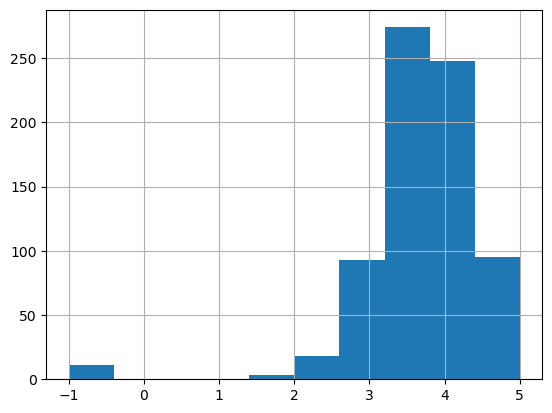

In [19]:
df.Rating.hist()

<AxesSubplot:>

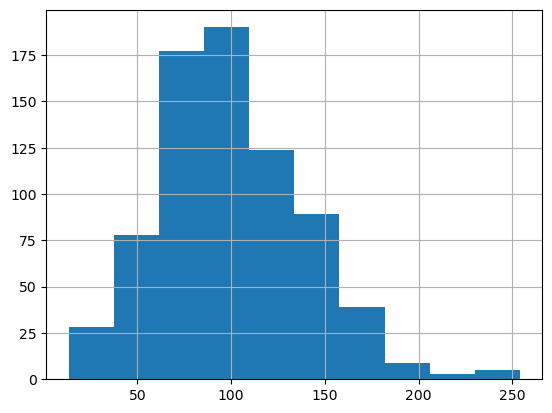

In [20]:
df.avg_salary.hist()

<AxesSubplot:>

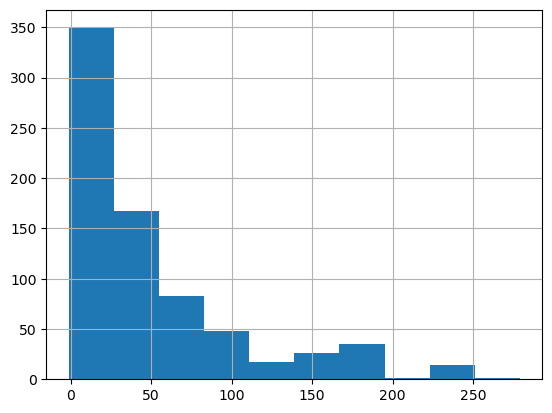

In [21]:
df.age.hist()

In [22]:
# Note: "age" isn't close of being normal distributed

<AxesSubplot:>

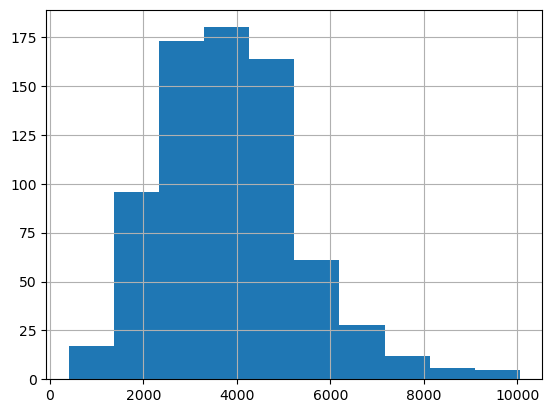

In [23]:
df.desc_len.hist()

<AxesSubplot:>

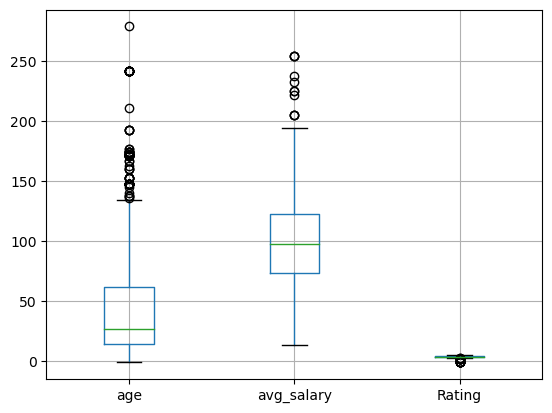

In [24]:
df.boxplot(column = ["age", "avg_salary", "Rating"])

<AxesSubplot:>

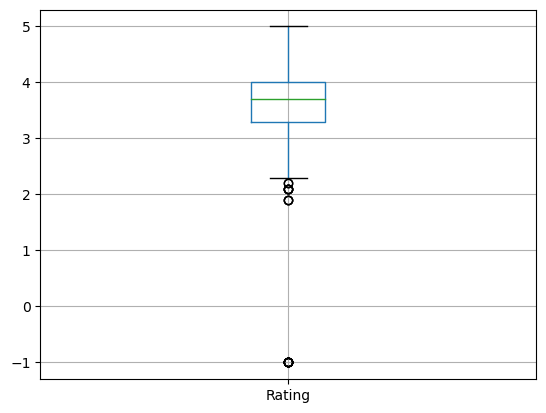

In [25]:
df.boxplot(column = ["Rating"])

In [26]:
df[["age", "avg_salary", "Rating", "desc_len"]].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019410,0.026164,0.164730
avg_salary,0.019410,1.000000,0.013492,0.078808
Rating,0.026164,0.013492,1.000000,-0.012281
desc_len,0.164730,0.078808,-0.012281,1.000000


<AxesSubplot:>

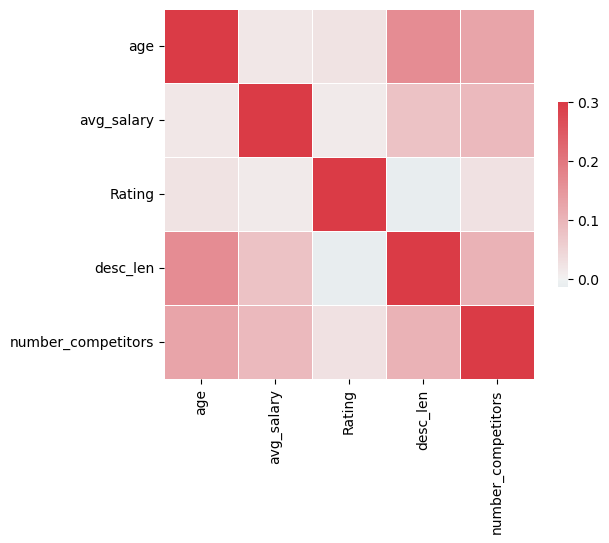

In [27]:
# Display correlation map using seaborn library

cmap = sns.diverging_palette(220, 10, as_cmap = True) # Set custom colors; cmap = cmap must be set in sns.heatmap() as an argument
sns.heatmap(df[["age", "avg_salary", "Rating", "desc_len", "number_competitors"]].corr(), vmax = .3, center = 0, cmap = cmap,
           square = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [28]:
"""
At first glance it seems like there's a correlation between "age" and "desc_len" as well as
a correlation between "avg_salary" and "desc_len".

It could be that the older the company the higher the number of competitors is.

It also seems like that there isn't any correlation between "Rating" and "desc_len".
"""

'\nAt first glance it seems like there\'s a correlation between "age" and "desc_len" as well as\na correlation between "avg_salary" and "desc_len".\n\nIt could be that the older the company the higher the number of competitors is.\n\nIt also seems like that there isn\'t any correlation between "Rating" and "desc_len".\n'

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'company_txt', 'Job Location', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'Python', 'R', 'Spark', 'AWS', 'Excel', 'SQL',
       'SAS', 'Keras', 'Pytorch', 'Scikit', 'Tensor', 'Hadoop', 'Tableau',
       'BI', 'Flink', 'Mongo', 'Google_an', 'Degree', 'Job Title Category',
       'job_description_simplified', 'seniority', 'desc_len',
       'number_competitors'],
      dtype='object')

In [30]:
df_category = df[["Location", "Headquarters", "Size", "Type of ownership", "Industry", "Sector", "Revenue", "company_txt",
   "job_state", "same_state", "Python", "R", "Spark", "AWS", "Excel", "job_description_simplified", "seniority"]]

Graph for Location: total = 200


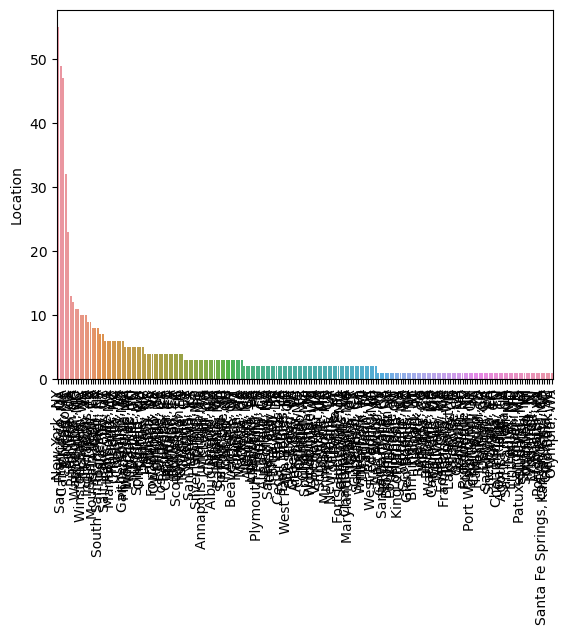

Graph for Headquarters: total = 198


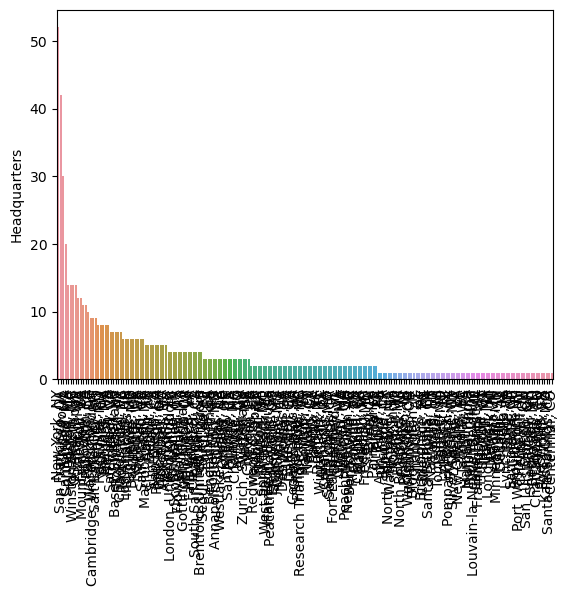

Graph for Size: total = 8


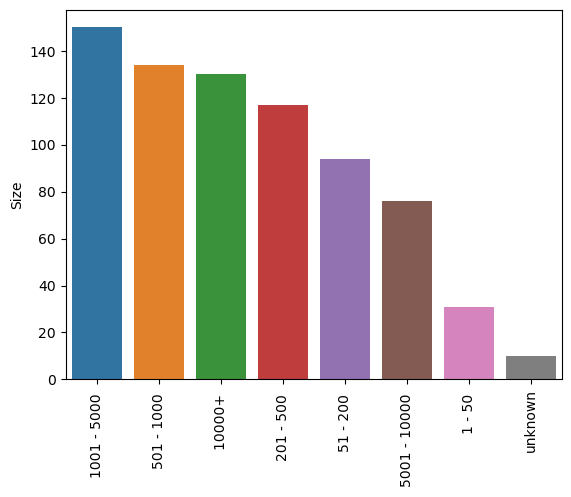

Graph for Type of ownership: total = 9


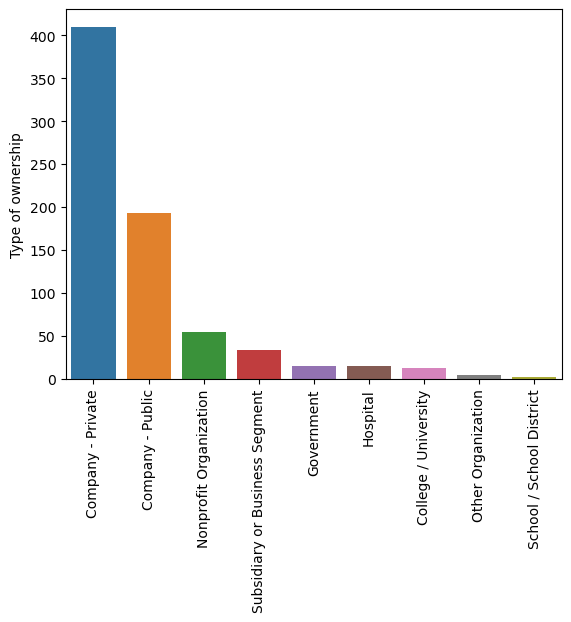

Graph for Industry: total = 60


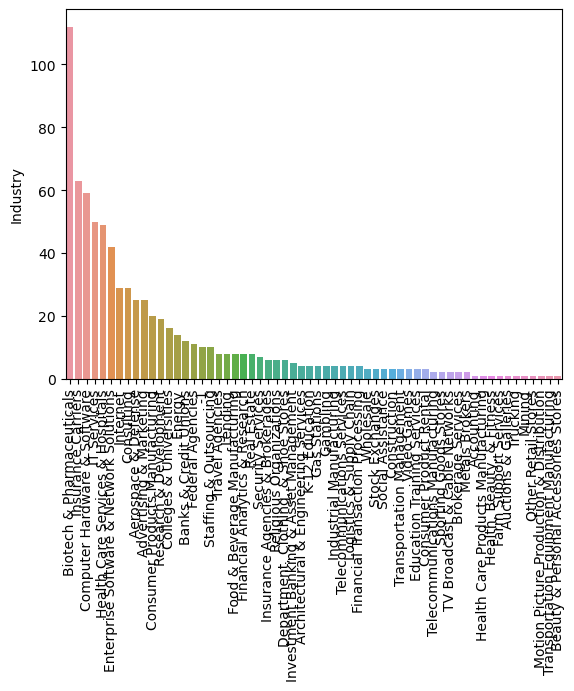

Graph for Sector: total = 25


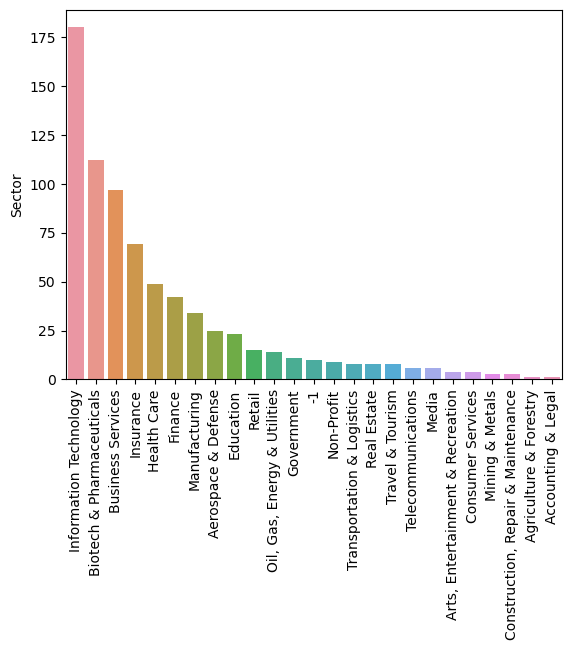

Graph for Revenue: total = 13


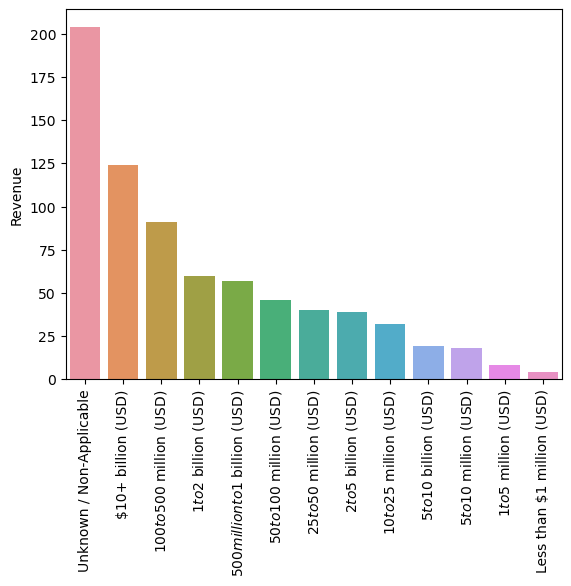

Graph for company_txt: total = 343


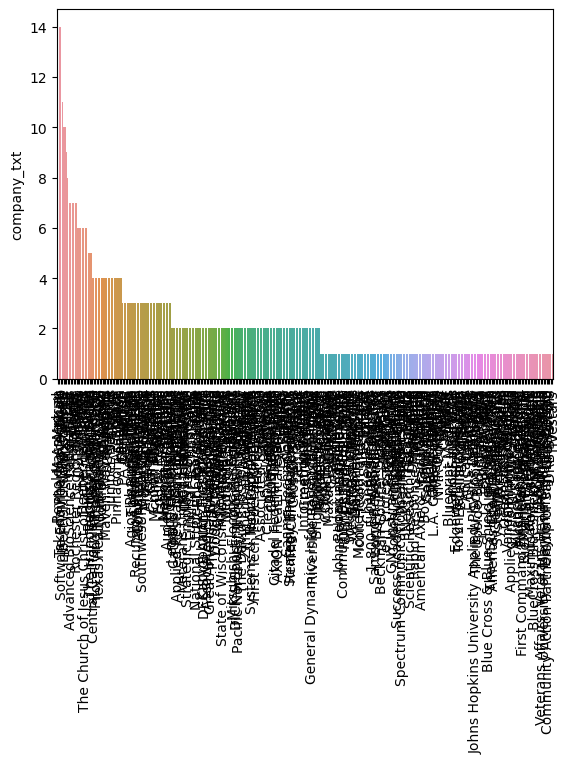

Graph for job_state: total = 37


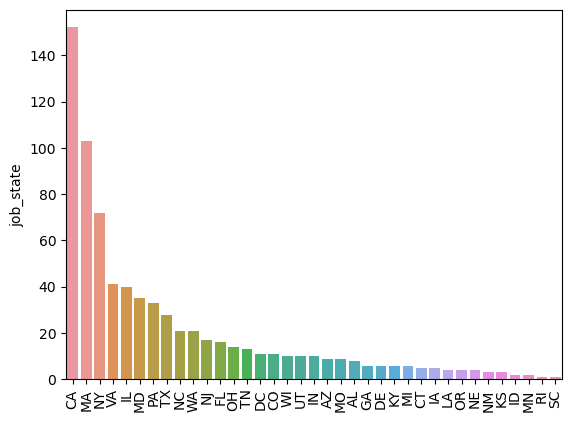

Graph for same_state: total = 2


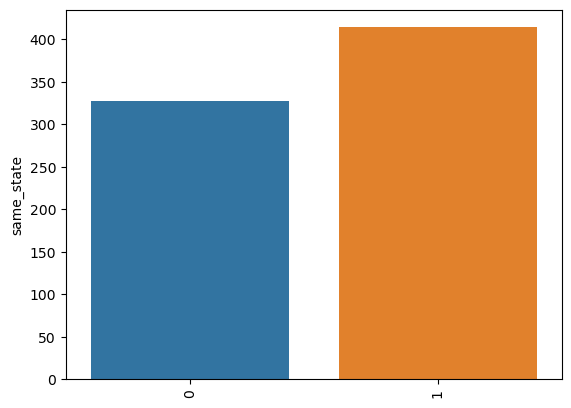

Graph for Python: total = 2


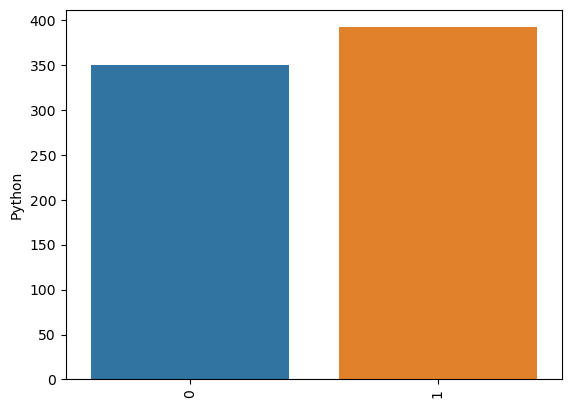

Graph for R: total = 2


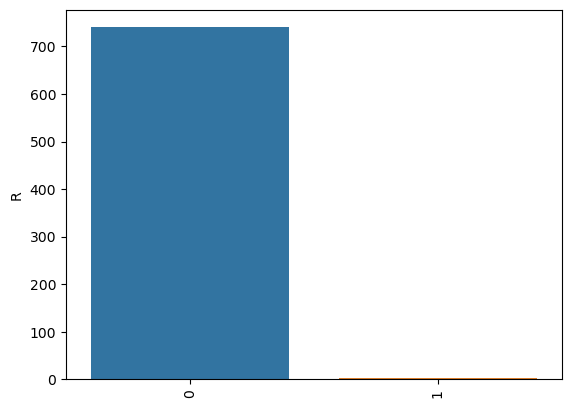

Graph for Spark: total = 2


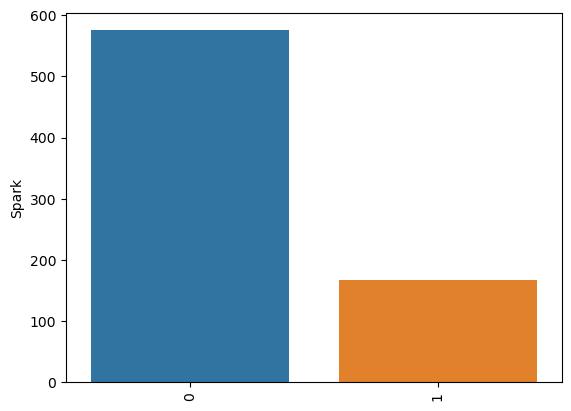

Graph for AWS: total = 2


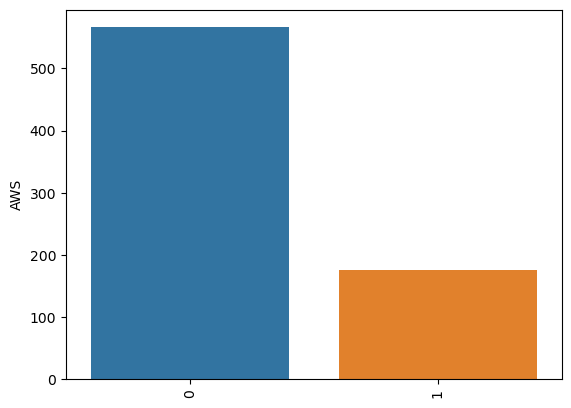

Graph for Excel: total = 2


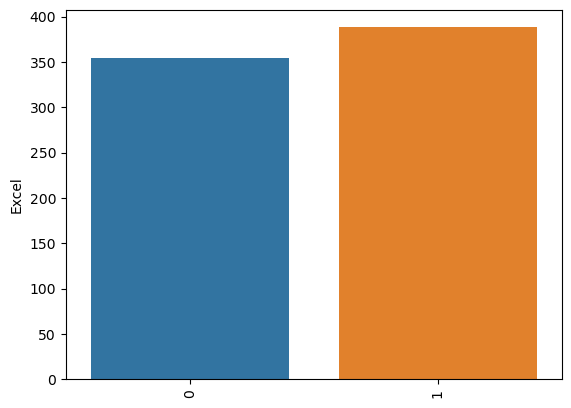

Graph for job_description_simplified: total = 7


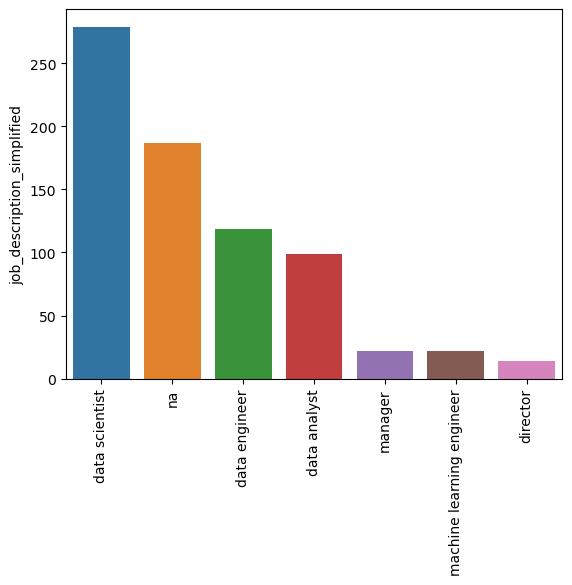

Graph for seniority: total = 3


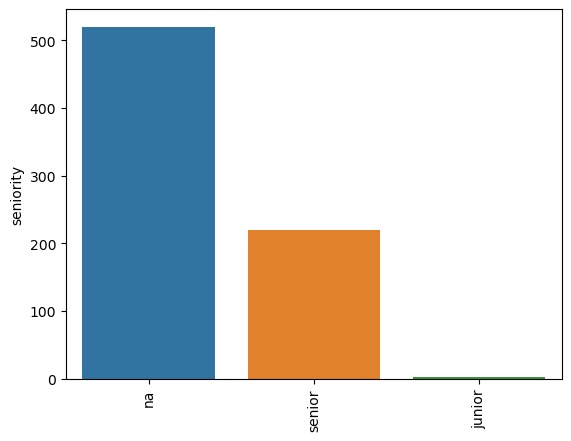

In [31]:
# Loop through df_category and show barplots of each category

for i in df_category.columns:
    category_index = df_category[i].value_counts() # Define new variable for better readability (argument x in barplot)
    print("Graph for %s: total = %d" % (i, len(category_index)))
    
    chart = sns.barplot(x = category_index.index, y = category_index)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    
    plt.show()

Graph for Location: total = 20


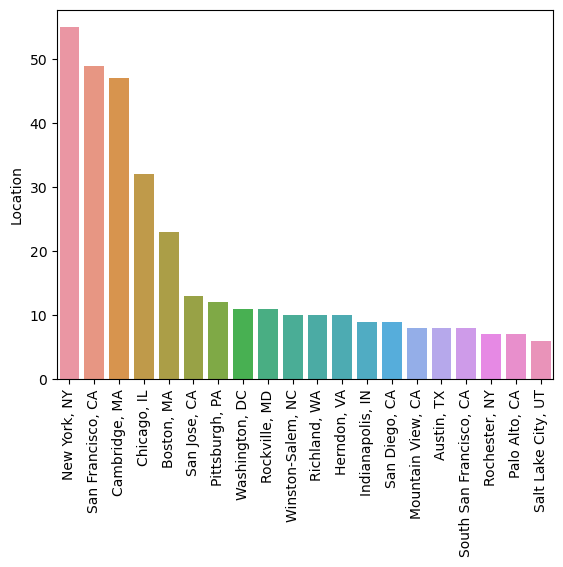

Graph for Headquarters: total = 20


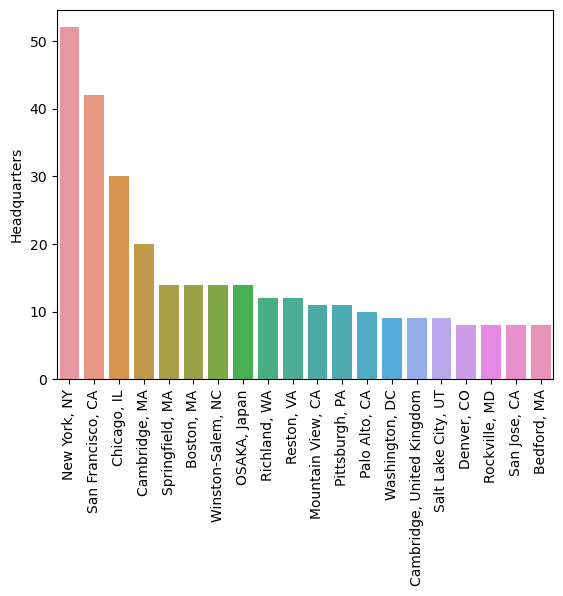

Graph for company_txt: total = 20


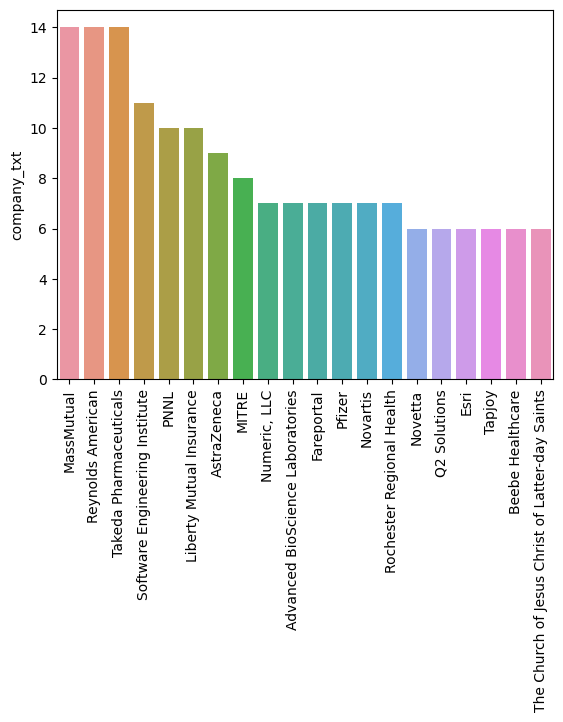

In [32]:
# Loop through the Top 20 of Location, Headquarters and company_txt since they're not shown properly in the previous plots

for i in df_category[["Location", "Headquarters", "company_txt"]].columns:
    category_index = df_category[i].value_counts()[:20] # [:20] Top 20 must be applied after .value_counts()
    print("Graph for %s: total = %d" % (i, len(category_index)))
    
    chart = sns.barplot(x = category_index.index, y = category_index)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    
    plt.show()

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'company_txt', 'Job Location', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'Python', 'R', 'Spark', 'AWS', 'Excel', 'SQL',
       'SAS', 'Keras', 'Pytorch', 'Scikit', 'Tensor', 'Hadoop', 'Tableau',
       'BI', 'Flink', 'Mongo', 'Google_an', 'Degree', 'Job Title Category',
       'job_description_simplified', 'seniority', 'desc_len',
       'number_competitors'],
      dtype='object')

In [34]:
# Investigate average salaries based on job descriptions
pd.pivot_table(df, index = "job_description_simplified", values = "avg_salary")

,avg_salary
job_description_simplified,
data analyst,64.621212
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning engineer,126.431818
manager,84.022727
na,85.203209


In [35]:
# Investigate average salaries based on job descriptions including level of seniority as an additional layer
pd.pivot_table(df, index = ["job_description_simplified", "seniority"], values = "avg_salary")

avg_salary
job_description_simplified seniority            
data analyst               junior      56.500000
                           na          60.812500
                           senior      75.480769
data engineer              na          96.701220
                           senior     124.689189
data scientist             junior     106.500000
                           na         107.043011
                           senior     138.956522
director                   na         168.607143
machine learning engineer  na         119.133333
                           senior     142.071429
manager                    na          84.022727
na                         na          73.980620
                           senior     110.163793

In [36]:
pd.pivot_table(df, index = ["job_state", "job_description_simplified"], values = "avg_salary").sort_values(
    "avg_salary", ascending = False)

avg_salary
job_state job_description_simplified            
IL        director                    221.750000
CA        machine learning engineer   177.300000
NJ        director                    161.500000
DC        data scientist              149.000000
CA        data scientist              142.522059
...                                          ...
CO        na                           31.500000
          data analyst                 29.500000
DE        na                           27.500000
LA        na                           20.000000
TN        data analyst                 13.500000

[114 rows x 1 columns]

In [37]:
# Expand all rows of the pivot table
pd.set_option("display.max_rows", None)

In [38]:
pd.pivot_table(df, index = ["job_state", "job_description_simplified"], values = "avg_salary").sort_values(
    "job_state", ascending = False)

avg_salary
job_state job_description_simplified            
WI        na                           54.000000
          data scientist              113.500000
          data analyst                 58.833333
WA        na                           97.500000
          data scientist               99.764706
          data analyst                 54.500000
VA        na                           79.300000
          machine learning engineer    87.000000
          data scientist              108.416667
          data engineer                96.900000
          data analyst                 71.583333
UT        data engineer               100.333333
          data analyst                 54.750000
          data scientist              140.500000
TX        na                           41.285714
          data scientist              100.730769
          data engineer               113.062500
TN        data scientist               96.000000
          data engineer               100.950000
          data analyst                 13.500000
SC        na                           60.500000
RI        data analyst                100.000000
PA        machine learning engineer   120.500000
          data engineer                91.500000
          data scientist              113.333333
          data analyst                 62.750000
          manager                     109.666667
          na                           76.062500
OR        data scientist               98.500000
          data engineer                73.000000
OH        na                           88.125000
          data scientist              105.285714
          data analyst                 45.500000
NY        na                           81.583333
          machine learning engineer   125.000000
          data scientist              115.250000
          data engineer                86.375000
          data analyst                 65.607143
NM        data scientist               74.333333
NJ        data scientist              106.875000
          data analyst                 65.700000
          data engineer               112.000000
          manager                     109.500000
          director                    161.500000
          na                          127.750000
NE        na                           41.000000
NC        na                           90.916667
          data scientist              117.000000
          data engineer               104.250000
MO        na                           72.333333
          manager                      40.500000
          data scientist              127.666667
          data analyst                 61.000000
MN        data engineer                95.000000
          data analyst                 76.000000
MI        manager                      87.500000
          data scientist              106.625000
MD        na                           88.750000
          data scientist              109.115385
          data engineer               109.000000
          data analyst                 80.666667
MA        na                          107.478261
          manager                      71.900000
          director                    117.833333
          data scientist              113.750000
          data engineer               107.291667
          data analyst                 59.125000
LA        data analyst                 48.000000
          data engineer                70.500000
          na                           20.000000
KY        na                          103.500000
          data scientist               84.000000
KS        machine learning engineer    87.000000
IN        na                           69.000000
          data scientist               84.500000
          data engineer               114.500000
IL        data analyst                 66.500000
          na                           57.166667
          machine learning engineer   133.000000
          director                    221.750000
          data scien

In [39]:
# Add an aggregation function and display the amount of offered jobs per state and role
pd.pivot_table(df, index = ["job_state", "job_description_simplified"], values = "avg_salary", aggfunc = "count").sort_values(
    "job_state", ascending = False)

avg_salary
job_state job_description_simplified            
WI        na                                   4
          data scientist                       3
          data analyst                         3
WA        na                                   1
          data scientist                      17
          data analyst                         3
VA        na                                   5
          machine learning engineer            2
          data scientist                      18
          data engineer                       10
          data analyst                         6
UT        data engineer                        3
          data analyst                         4
          data scientist                       3
TX        na                                   7
          data scientist                      13
          data engineer                        8
TN        data scientist                       1
          data engineer                       10
          data analyst                         2
SC        na                                   1
RI        data analyst                         1
PA        machine learning engineer            7
          data engineer                        1
          data scientist                       6
          data analyst                         8
          manager                              3
          na                                   8
OR        data scientist                       3
          data engineer                        1
OH        na                                   4
          data scientist                       7
          data analyst                         3
NY        na                                  12
          machine learning engineer            2
          data scientist                      40
          data engineer                        4
          data analyst                        14
NM        data scientist                       3
NJ        data scientist                       4
          data analyst                         5
          data engineer                        2
          manager                              2
          director                             2
          na                                   2
NE        na                                   4
NC        na                                  12
          data scientist                       3
          data engineer                        6
MO        na                                   3
          manager                              1
          data scientist                       3
          data analyst                         2
MN        data engineer                        1
          data analyst                         1
MI        manager                              2
          data scientist                       4
MD        na                                  16
          data scientist                      13
          data engineer                        3
          data analyst                         3
MA        na                                  46
          manager                              5
          director                             6
          data scientist                      30
          data engineer                       12
          data analyst                         4
LA        data analyst                         1
          data engineer                        2
          na                                   1
KY        na                                   4
          data scientist                       2
KS        machine learning engineer            3
IN        na                                   4
          data scientist                       2
          data engineer                        4
IL        data analyst                         3
          na                                   6
          machine learning engineer            2
          director                             6
          data scien

In [40]:
# Search only the amount of Data Scientist
pd.pivot_table(df[df.job_description_simplified == "data scientist"], index = "job_state", 
               values = "avg_salary").sort_values("avg_salary", ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [41]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'company_txt', 'Job Location', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'Python', 'R', 'Spark', 'AWS', 'Excel', 'SQL',
       'SAS', 'Keras', 'Pytorch', 'Scikit', 'Tensor', 'Hadoop', 'Tableau',
       'BI', 'Flink', 'Mongo', 'Google_an', 'Degree', 'Job Title Category',
       'job_description_simplified', 'seniority', 'desc_len',
       'number_competitors'],
      dtype='object')

In [42]:
# Rating, Industry, Sector, Revenue, number of comp, hourly, employer provided, Python, R, Spark, AWS, Excel, desc_len, Type of ownership

In [43]:
# Define new df_pivots to loop through
df_pivots = df[["Rating", "Industry", "Sector", "Revenue", "number_competitors", "hourly", "employer_provided", "Python", "R", 
            "Spark", "AWS", "Excel", "Type of ownership", "avg_salary"]]

In [44]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = "avg_salary").sort_values("avg_salary", ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [45]:
pd.pivot_table(df_pivots, index = "Revenue", columns = "Python", values = "avg_salary", aggfunc = "count")

Python,0,1
Revenue,,
$1 to $2 billion (USD),16,44
$1 to $5 million (USD),1,7
$10 to $25 million (USD),16,16
$10+ billion (USD),66,58
$100 to $500 million (USD),47,44
$2 to $5 billion (USD),17,22
$25 to $50 million (USD),24,16
$5 to $10 billion (USD),9,10
$5 to $10 million (USD),9,9
